In [2]:
import sys, os

# Get the parent directory of the notebook (the project root)
PROJECT_ROOT = os.path.abspath("..")

# Add it to Python path if not there already
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

print("Project root added to sys.path:", PROJECT_ROOT)

Project root added to sys.path: c:\Users\rende\OneDrive\Desktop\Data Analysis Projects\AI-Business-Insights-Platform\AI-Business-Insights-Platform


In [3]:
import pandas as pd
from src.data_cleaning import basic_cleaning, load_data
from src.churn_model import train_and_evaluate_churn_models

In [5]:

# 1) Load raw Telco churn data
churn_raw = load_data("../data/raw/Telco_customer_churn.csv")

In [6]:
# 2) Reuse your generic cleaner (optional but nice)
churn_clean = basic_cleaning(churn_raw)

In [7]:
# 3) Train + evaluate Logistic Regression & RandomForest
models, metrics = train_and_evaluate_churn_models(churn_clean)

metrics


===== Logistic Regression =====
Confusion Matrix:
 [[934 101]
 [ 23 351]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1035
           1       0.78      0.94      0.85       374

    accuracy                           0.91      1409
   macro avg       0.88      0.92      0.89      1409
weighted avg       0.92      0.91      0.91      1409

Accuracy:  0.9120
Precision: 0.7765
Recall:    0.9385
F1-score:  0.8499
ROC-AUC:   0.9746

===== Random Forest =====
Confusion Matrix:
 [[935 100]
 [ 51 323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      1035
           1       0.76      0.86      0.81       374

    accuracy                           0.89      1409
   macro avg       0.86      0.88      0.87      1409
weighted avg       0.90      0.89      0.89      1409

Accuracy:  0.8928
Precision: 0.7636
Recall:    0.8636
F1-score

{'logistic_regression': {'accuracy': 0.9119943222143364,
  'precision': 0.7765486725663717,
  'recall': 0.9385026737967914,
  'f1': 0.8498789346246973,
  'roc_auc': 0.9745743883851301},
 'random_forest': {'accuracy': 0.8928317955997161,
  'precision': 0.7635933806146572,
  'recall': 0.8636363636363636,
  'f1': 0.8105395232120451,
  'roc_auc': 0.9445865302642795}}

#### ROC curves for both models

In [25]:
import pandas as pd

# 1) Load Telco churn dataset
churn = pd.read_csv("../data/raw/Telco_customer_churn.csv")

# 2) Fix numeric column that often causes problems
#    Total Charges sometimes has spaces / weird chars -> coerce to NaN then fill
churn["Total Charges"] = pd.to_numeric(churn["Total Charges"], errors="coerce")

# 3) Churn Reason has lots of missing values – either drop or impute
#    Here we impute to keep the rows
churn["Churn Reason"] = churn["Churn Reason"].fillna("Unknown")


In [26]:
# Target column
target_col = "Churn Value"

# Columns we do NOT want as features
drop_cols = [
    "CustomerID",
    "Churn Label",
    "Churn Value",
    "Churn Score",
    "CLTV",
    "Lat Long",
    "Churn Reason",  # we can keep or drop; dropping keeps it simple
]

# 4) Build feature matrix (one-hot encode categoricals)
X = pd.get_dummies(churn.drop(columns=drop_cols, errors="ignore"), drop_first=True)

# 5) Target vector
y = churn[target_col]

# 6) Drop any rows that still have NaNs in X
mask = ~X.isna().any(axis=1)
X = X[mask]
y = y[mask]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Logistic Regression -----
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]

print("===== Logistic Regression =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("Accuracy: ", round(accuracy_score(y_test, y_pred_log), 4))
print("Precision:", round(precision_score(y_test, y_pred_log), 4))
print("Recall:   ", round(recall_score(y_test, y_pred_log), 4))
print("F1-score: ", round(f1_score(y_test, y_pred_log), 4))
print("ROC-AUC:  ", round(roc_auc_score(y_test, y_proba_log), 4))

# ----- Random Forest -----
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n===== Random Forest =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy: ", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:   ", round(recall_score(y_test, y_pred_rf), 4))
print("F1-score: ", round(f1_score(y_test, y_pred_rf), 4))
print("ROC-AUC:  ", round(roc_auc_score(y_test, y_proba_rf), 4))


c:\Users\rende\OneDrive\Desktop\Data Analysis Projects\AI-Business-Insights-Platform\AI-Business-Insights-Platform\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


===== Logistic Regression =====
Confusion Matrix:
 [[901 132]
 [145 229]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1033
           1       0.63      0.61      0.62       374

    accuracy                           0.80      1407
   macro avg       0.75      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy:  0.8031
Precision: 0.6343
Recall:    0.6123
F1-score:  0.6231
ROC-AUC:   0.8403

===== Random Forest =====
Confusion Matrix:
 [[931 102]
 [187 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407

Accuracy:  0.7946
Precision: 0.6471
Recall:    0.5
F1-score:  0

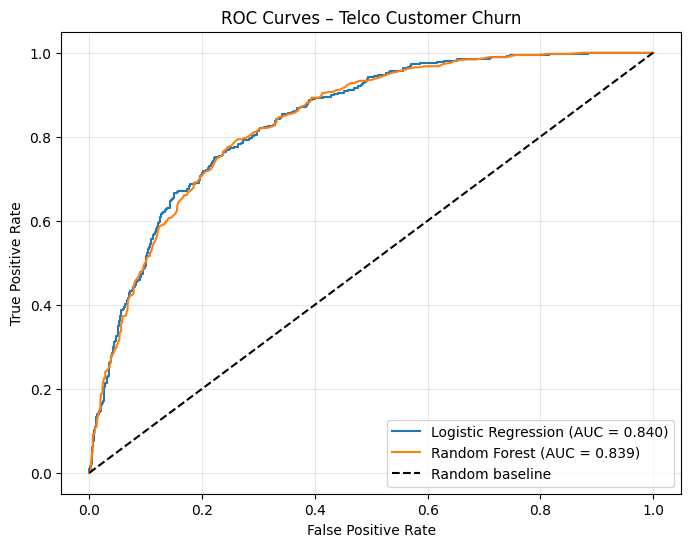

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Telco Customer Churn")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
